In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 



In [6]:
df_US_DA = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == 'United States')].copy()
df_US_DA = df_US_DA.dropna(subset=['salary_year_avg'])
df_US_DA['salary_year_avg'].sample(10)

363517     90000.0
462186    100000.0
125475     43656.0
550681     50000.0
304291     57500.0
435949    138516.0
350575    105000.0
257553    125000.0
581853     99500.0
605418    150000.0
Name: salary_year_avg, dtype: float64

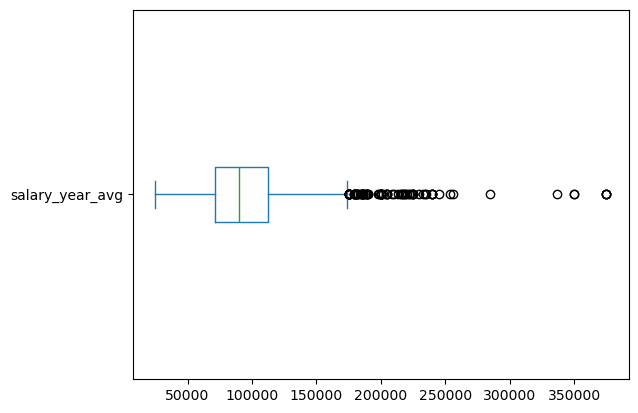

In [9]:
df_US_DA['salary_year_avg'].plot(kind='box', vert = False)

plt.show()

# comparing boxplot and histogram in same figure side by side

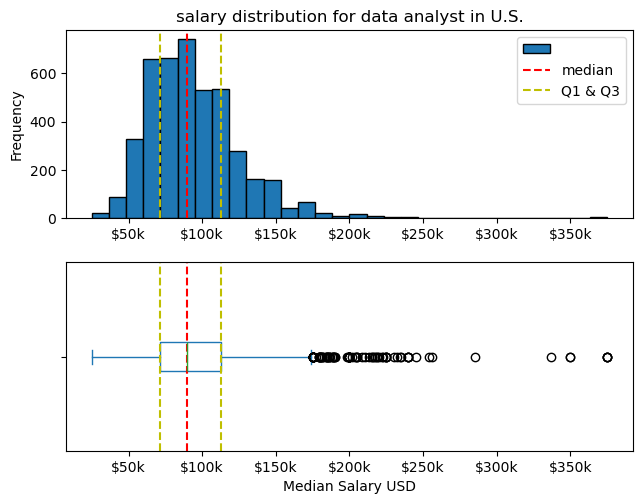

In [30]:
fig , ax = plt.subplots(2,1)
fig.tight_layout()

df_US_DA['salary_year_avg'].plot(kind='hist' ,ax= ax[0] , bins = 30, edgecolor = 'black')
ax[0].set_title('salary distribution for data analyst in U.S.')
ax[0].set_xlabel('')
#ax[0].set_ylabel()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}k'))

ax[0].axvline(df_US_DA['salary_year_avg'].median(), color= 'r', linestyle= '--')
ax[0].axvline(df_US_DA['salary_year_avg'].quantile(0.25), color='y', linestyle = '--')
ax[0].axvline(df_US_DA['salary_year_avg'].quantile(0.75), color='y', linestyle = '--')
ax[0].legend(['','median','Q1 & Q3'])
# -----------------------------------------------------------------------------------------------------------

df_US_DA['salary_year_avg'].plot(kind='box' ,ax= ax[1] , vert = False)

ax[1].set_xlabel('Median Salary USD')
ax[1].set_ylabel('')
ax[1].set_yticklabels('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}k'))

ax[1].axvline(df_US_DA['salary_year_avg'].median(), color= 'r', linestyle= '--')
ax[1].axvline(df_US_DA['salary_year_avg'].quantile(0.25), color='y', linestyle = '--')
ax[1].axvline(df_US_DA['salary_year_avg'].quantile(0.75), color='y', linestyle = '--')





In [37]:
job_title = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_title)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
df_US['job_title_short'].value_counts()


job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [ ]:
job_list = [df_US[df_US['job_title_short'] == jt]['salary_year_avg'] for jt in job_title]
#job_list

92        120000.0
146       129500.0
307       185000.0
339       195000.0
380        97500.0
            ...   
783111    125000.0
784102     90000.0
784191    217500.0
785624    139216.0
785641    150000.0
Name: salary_year_avg, Length: 2915, dtype: float64

C:\Users\soods\AppData\Local\Temp\ipykernel_2824\478811420.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_title, vert = False)


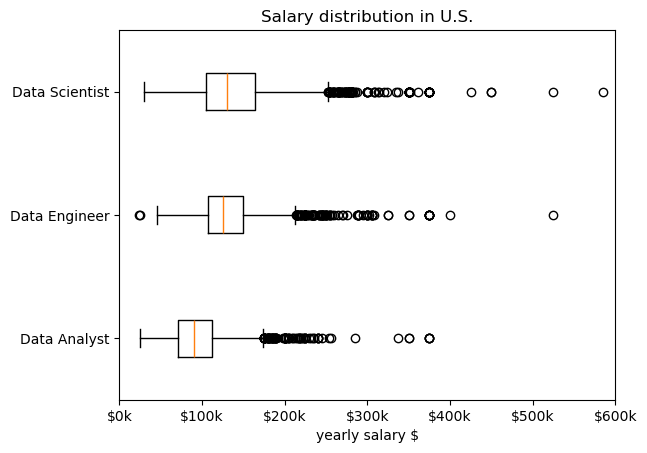

In [47]:
plt.boxplot(job_list, labels = job_title, vert = False)
plt.title('Salary distribution in U.S.')
plt.xlabel('yearly salary $')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
plt.xlim(0,600000)
plt.show()